### Pytorch Introduction

Basic guide to core pytorch areas

#### Tensors

Specialised data structure used to encode the inputs and outputs of a model. Similar to numpy arrays, except can run on GPU's and other hardware accelerators.

##### Initialisation

In [36]:
import torch
import numpy as np

# From python
data = [[1, 2], [3,4]]
x_data = torch.tensor(data)

# from numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

# from another tensor
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

# from shape
shape = (2, 3, 2)
zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.0444, 0.9993],
        [0.8961, 0.5169]]) 

Zeros Tensor: 
 tensor([[[0., 0.],
         [0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.],
         [0., 0.]]]) 



##### Tensor Attributes

Each tensor (torch.Tensor) has three attributes:
* torch.dtype - object that represents the datatype of the tensor
* torch.device - object representing the device that the tensor will be allocated to
* torch.layout - object that represents the memory layout. Two types:
    * torch.strided - Strides are a list of integers: the k-th stride represents the jump in the memory necessary to go from one element to the next one in the kth dimension of the Tensor.
    * Used to store array in the sparse coordinate list. In COO format, the specified elements are stored as tuples of element indices and the corresponding values. 

In [37]:
tensor = torch.rand(3, 4)

print(f'Tensor Shape: {tensor.shape}')
print(f'Tensor Type: {tensor.dtype}')
print(f'Tensor Device: {tensor.device}')

Tensor Shape: torch.Size([3, 4])
Tensor Type: torch.float32
Tensor Device: cpu


##### Tensor Operations

Indexing and Slicing

In [38]:
tensor = torch.rand(4, 4)
print(tensor)
print(f'First Row: {tensor[0]}')
print(f'Last Row: {tensor[-1]}')
print(f"Last column: {tensor[..., -1]}")
tensor[:, 1] = 0
print(tensor)


tensor([[0.7345, 0.4345, 0.8382, 0.0689],
        [0.7253, 0.4120, 0.3729, 0.6816],
        [0.5540, 0.0383, 0.1528, 0.4802],
        [0.9447, 0.7939, 0.2443, 0.7687]])
First Row: tensor([0.7345, 0.4345, 0.8382, 0.0689])
Last Row: tensor([0.9447, 0.7939, 0.2443, 0.7687])
Last column: tensor([0.0689, 0.6816, 0.4802, 0.7687])
tensor([[0.7345, 0.0000, 0.8382, 0.0689],
        [0.7253, 0.0000, 0.3729, 0.6816],
        [0.5540, 0.0000, 0.1528, 0.4802],
        [0.9447, 0.0000, 0.2443, 0.7687]])


Joins

In [39]:
t1 = torch.cat([tensor, tensor], dim=1)
print(t1)

tensor([[0.7345, 0.0000, 0.8382, 0.0689, 0.7345, 0.0000, 0.8382, 0.0689],
        [0.7253, 0.0000, 0.3729, 0.6816, 0.7253, 0.0000, 0.3729, 0.6816],
        [0.5540, 0.0000, 0.1528, 0.4802, 0.5540, 0.0000, 0.1528, 0.4802],
        [0.9447, 0.0000, 0.2443, 0.7687, 0.9447, 0.0000, 0.2443, 0.7687]])


Arithmetic Operations

In [40]:
tensor = torch.rand(4, 4)

# different methods to do matrix multiplication
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
y3 = torch.rand_like(y1)

torch.matmul(tensor, tensor.T, out = y3)

print(y1, y2, y3)

# elementwise methods
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)

torch.mul(tensor, tensor, out = z3)
print(z1, z2, z3)

tensor([[1.0551, 0.5027, 0.8322, 0.5403],
        [0.5027, 0.6751, 0.4479, 0.4709],
        [0.8322, 0.4479, 0.8842, 0.3730],
        [0.5403, 0.4709, 0.3730, 0.4180]]) tensor([[1.0551, 0.5027, 0.8322, 0.5403],
        [0.5027, 0.6751, 0.4479, 0.4709],
        [0.8322, 0.4479, 0.8842, 0.3730],
        [0.5403, 0.4709, 0.3730, 0.4180]]) tensor([[1.0551, 0.5027, 0.8322, 0.5403],
        [0.5027, 0.6751, 0.4479, 0.4709],
        [0.8322, 0.4479, 0.8842, 0.3730],
        [0.5403, 0.4709, 0.3730, 0.4180]])
tensor([[6.7315e-02, 3.1215e-01, 5.5172e-01, 1.2392e-01],
        [1.5511e-01, 8.7337e-02, 2.6214e-05, 4.3267e-01],
        [5.9346e-02, 6.8614e-01, 1.1302e-01, 2.5710e-02],
        [1.1993e-01, 2.1475e-02, 8.2612e-02, 1.9403e-01]]) tensor([[6.7315e-02, 3.1215e-01, 5.5172e-01, 1.2392e-01],
        [1.5511e-01, 8.7337e-02, 2.6214e-05, 4.3267e-01],
        [5.9346e-02, 6.8614e-01, 1.1302e-01, 2.5710e-02],
        [1.1993e-01, 2.1475e-02, 8.2612e-02, 1.9403e-01]]) tensor([[6.7315e-02, 3.1215

#### Datasets and Dataloaders

code for processing data samples can get messy and hard to maintain. Ideally want dataset code to be decoupled from the model training code.

##### Loading a dataset

In [41]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor())

test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor())

##### Visualising the dataset

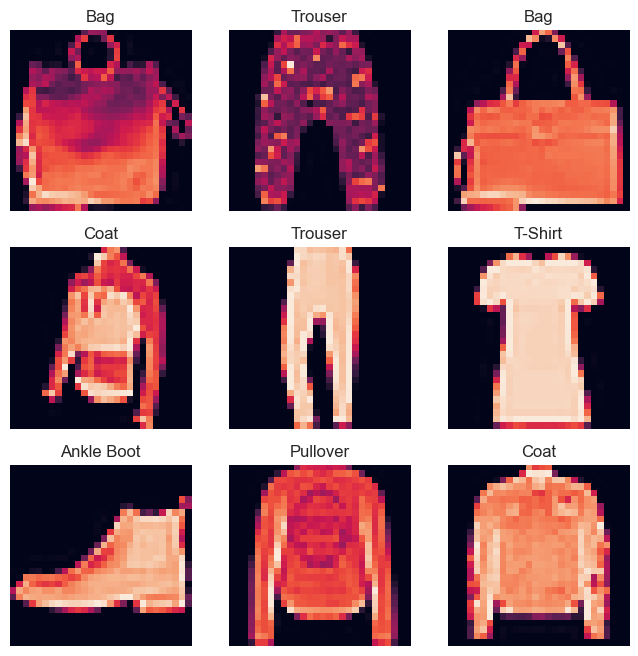

In [42]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1,cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows , cols , i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze())

plt.show()

##### Creating custom dataset for files

In [43]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform = None, target_transform = None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)

        return image, label

##### Dataloaders

Dataset retrieves dataset's features and labels one sample at a time. While training model, typically want to pass samples in "minibatches", reshuffle data at every epoch to reduce overfitting, and use Pythons multiprocessing to speed up data retrieval.

Dataloader abstracts this complexity for us in an easy API

In [44]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature Batch Shape: <built-in method size of Tensor object at 0x309d2ffb0>
Label Batch Shape: <built-in method size of Tensor object at 0x15fd63e30>


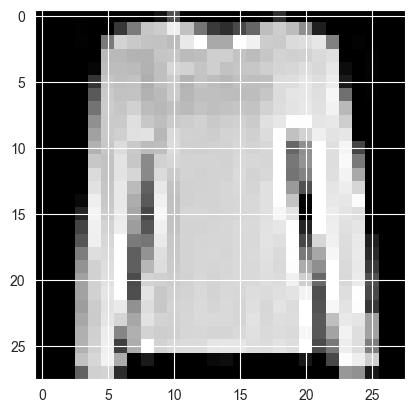

Label: 6


In [45]:
# Using the dataloader

train_features, train_labels = next(iter(train_dataloader))
print(f"Feature Batch Shape: {train_features.size}")
print(f"Label Batch Shape: {train_labels.size}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f"Label: {label}")

#### Transforms

Use transforms to perform some manipulation of the data to make it suitable for training.

All torchvision datasets have two parameters
* transform - modify the features
* target_transform - modify the labels

In [46]:
# Applying a OHE transform for the fashionMINST dataset

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(), target_transform=Lambda(lambda x: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(x, value=1))))

#### Building Model

In [47]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using mps device


In [48]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [49]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [50]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted Label: {y_pred}")

Predicted Label: tensor([7], device='mps:0')


Breaking down the above procedure

In [51]:
# input, a mini batch of size 28 * 28
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [52]:
# flatten -> converts each 2D 28 * 28 image into a contiguous array of pixels
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [53]:
# nn.Linear performs a linear transformation on input using stored weights and biases
layer1 = nn.Linear(in_features = 28*28, out_features = 10)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 10])


In [54]:
# activation functions - introduce non - linearity into the model
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0913,  0.1094, -0.1948, -0.2182,  0.8903, -0.0516,  0.3930, -0.1209,
          0.3095,  0.3530],
        [ 0.1494, -0.0510, -0.2264, -0.5413,  0.7322, -0.1862,  0.0939,  0.2148,
         -0.1165,  0.2791],
        [ 0.0191, -0.0463,  0.0844,  0.2281,  0.6752, -0.2783,  0.2261, -0.3370,
          0.4532,  0.8771]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0913, 0.1094, 0.0000, 0.0000, 0.8903, 0.0000, 0.3930, 0.0000, 0.3095,
         0.3530],
        [0.1494, 0.0000, 0.0000, 0.0000, 0.7322, 0.0000, 0.0939, 0.2148, 0.0000,
         0.2791],
        [0.0191, 0.0000, 0.0844, 0.2281, 0.6752, 0.0000, 0.2261, 0.0000, 0.4532,
         0.8771]], grad_fn=<ReluBackward0>)


In [55]:
# nn.Sequential - ordered container of modules. Data passed through all modules in the same order as defined

seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(10, 10)
)

input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

In [56]:
# nn.Softmax - logits scaled to (0,1) representing predicted probability of each class

##### Model Parameters

In [57]:
print(f"Model Structure: {model}")
for name, param in model.named_parameters():
    print(f"Layer: {name}, Size: {param.size()}, Values: {param[:2]}")

Model Structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Layer: linear_relu_stack.0.weight, Size: torch.Size([512, 784]), Values: tensor([[ 0.0037,  0.0204,  0.0282,  ..., -0.0015,  0.0083, -0.0195],
        [ 0.0056, -0.0327,  0.0355,  ..., -0.0162, -0.0357, -0.0100]],
       device='mps:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.0.bias, Size: torch.Size([512]), Values: tensor([ 0.0010, -0.0355], device='mps:0', grad_fn=<SliceBackward0>)
Layer: linear_relu_stack.2.weight, Size: torch.Size([512, 512]), Values: tensor([[ 0.0307, -0.0419, -0.0080,  ..., -0.0372, -0.0154,  0.0361],
        [-0.0138, -0.0231, -0.0087,  ..., -0.0193, -0.0025,  0.0102]],
       device='mps:0', grad_fn=<SliceBackward0>)
Lay

#### Autodifferentiaion

In [58]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [59]:
print(f"Gradient function for z = {z.grad_fn}")
print(f"Gradient function for loss = {loss.grad_fn}")

Gradient function for z = <AddBackward0 object at 0x309b62a70>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x309b63250>


##### Computing Gradients

can only obtain grad properties for leaf nodes of graph which have requires_grad set to True. Can only perform gradient calculations using backward once on a given graph, unless retain_graph=True is passed

In [60]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0154, 0.1486, 0.2874],
        [0.0154, 0.1486, 0.2874],
        [0.0154, 0.1486, 0.2874],
        [0.0154, 0.1486, 0.2874],
        [0.0154, 0.1486, 0.2874]])
tensor([0.0154, 0.1486, 0.2874])


##### Disabling gradient tracking

By default, all tensors with requires_grad=True are tracking their computational history and support gradient computation. When just trying to do a forward pass for classification, do not need this, so can turn off grad to make more efficient.

In [61]:
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad():
    z = torch.matmul(x, w)+b
print(z.requires_grad)

True
False


#### Parameter Optimisation

##### Hyperparameters

adjustable parameters to control the model optimisation process
* Number of epochs - number of times to iterate over the dataset
* batch size - number of data samples propogated through network before parameters updated
* learning rate - how much to update parameters at each epoch

In [62]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

##### Optimisation Loop

Key ingredients:
* Loss function - measures degree of dissimilarity of obtained result to target value
* Optimiser - how model parameters get updated

In [63]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [64]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    model.train()
    for batch, (X, y) in enumerate(dataloader):

        X, y = X.to("mps"), y.to("mps")
        # compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        #backpropogation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to("mps"), y.to("mps")
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


In [65]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.310556  [   64/60000]
loss: 2.297529  [ 6464/60000]
loss: 2.275525  [12864/60000]
loss: 2.256576  [19264/60000]
loss: 2.244257  [25664/60000]
loss: 2.231665  [32064/60000]
loss: 2.219066  [38464/60000]
loss: 2.199417  [44864/60000]
loss: 2.156757  [51264/60000]
loss: 2.168595  [57664/60000]
Test Error: 
 Accuracy: 47.9%, Avg loss: 2.153989 

Epoch 2
-------------------------------
loss: 2.164448  [   64/60000]
loss: 2.132773  [ 6464/60000]
loss: 2.119395  [12864/60000]
loss: 2.081265  [19264/60000]
loss: 2.020607  [25664/60000]
loss: 2.045762  [32064/60000]
loss: 2.030161  [38464/60000]
loss: 1.924778  [44864/60000]
loss: 1.936426  [51264/60000]
loss: 1.895191  [57664/60000]
Test Error: 
 Accuracy: 56.7%, Avg loss: 1.879531 

Epoch 3
-------------------------------
loss: 1.874000  [   64/60000]
loss: 1.888147  [ 6464/60000]
loss: 1.780983  [12864/60000]
loss: 1.764666  [19264/60000]
loss: 1.728886  [25664/60000]
loss: 1.704181  [32064/600

### Autograd

Allows for the fast and easy computation of multiple partial derivatives. Traces computation dynamically at runtime, so if there are any branches or loops, computation can still be traced correctly

Every computed tensor in the pytorch model carries a history of its input tensors, and the function used to create it. Combined with the fact that PyTorch functions meant to act on tensors each have a built-in implementation for computing their own derivatives, this greatly speeds the computation of the local derivatives needed for learning.

##### Basic example on a math function

In [70]:
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

a = torch.linspace(0., 2. * math.pi, steps = 25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


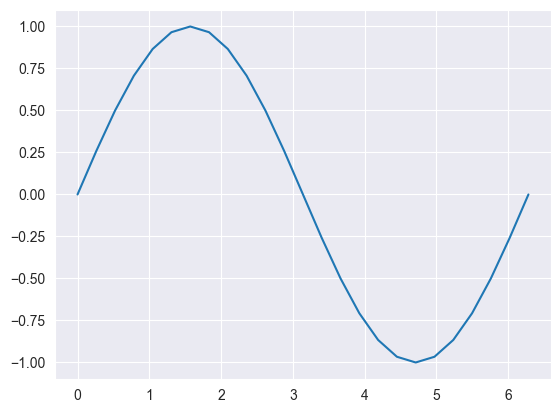

In [71]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [72]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [73]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [74]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [75]:
print(d)
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)
((<MulBackward0 object at 0x309f1ae60>, 0), (None, 0))
((<SinBackward0 object at 0x309f18e80>, 0), (None, 0))
((<AccumulateGrad object at 0x309f1bfa0>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


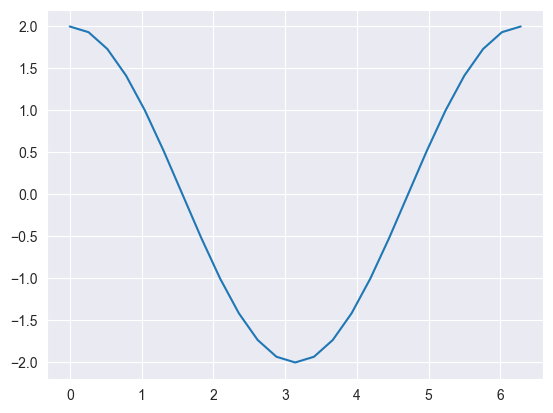

In [76]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())


*only leaf nodes have their gradients computed - here, only the input is a leaf node, so only it has its gradients computed

##### Autograd in Training

In [77]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(DIM_IN, HIDDEN_SIZE)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(HIDDEN_SIZE, DIM_OUT)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [78]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([-0.0672, -0.0459,  0.0840, -0.0539, -0.0208, -0.0802,  0.0854, -0.0811,
         0.0918, -0.0725], grad_fn=<SliceBackward0>)
None


In [79]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
prediction = model(some_input)
loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(170.2784, grad_fn=<SumBackward0>)


In [80]:
loss.backward()

In [81]:
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0672, -0.0459,  0.0840, -0.0539, -0.0208, -0.0802,  0.0854, -0.0811,
         0.0918, -0.0725], grad_fn=<SliceBackward0>)
tensor([-2.1483, -0.3534,  2.3632, -3.8997, -4.6875, -6.1816,  0.1201,  0.3918,
         4.4591, -0.7928])


gradients have been computed for each learning rate, however the weights still remain unchanged, as we haven't run the optimiser yet. Optimiser responsible for computing the model weights based on the computed gradients

In [82]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0651, -0.0456,  0.0817, -0.0500, -0.0161, -0.0740,  0.0853, -0.0815,
         0.0873, -0.0717], grad_fn=<SliceBackward0>)
tensor([-2.1483, -0.3534,  2.3632, -3.8997, -4.6875, -6.1816,  0.1201,  0.3918,
         4.4591, -0.7928])


*after calling optimizer.step, need to call optimizer.zero_grad() or else every time loss.backward() is run, gradients on the learning rate will accumulate

In [83]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none=False)

print(model.layer2.weight.grad[0][0:10])

tensor([-2.1483, -0.3534,  2.3632, -3.8997, -4.6875, -6.1816,  0.1201,  0.3918,
         4.4591, -0.7928])
tensor([  1.3091,  -3.5395,  15.1392, -20.0453, -24.2905,  -7.3394, -14.5907,
          4.7617,  10.8266,  -4.0656])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


can see accumulation of gradients from line 1 to line 2 above

##### Turning autograd on and off

In [84]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2*a
print(b1)

a.requires_grad = False
b2 = 2*a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [85]:
# can also turn off autograd temporarily

a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [86]:
# can also be used as a function or method decorator

def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [87]:
# also can use detach - creates copy of tensor detached from computation history

x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.8671, 0.7607, 0.3749, 0.4283, 0.3861], requires_grad=True)
tensor([0.8671, 0.7607, 0.3749, 0.4283, 0.3861])
